In [110]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

rootFolder = "/home/giangtm/Work/Projects/DataScience/dataset/"
df= pd.read_csv(rootFolder + "codecheck-speed-up.csv",sep=';')
df.head()

,username,datework,finishtime,totaltime,amount_inhaltsstoffe,amount_zusatzinformationen,status,type
0,dvhdiem,2017-09-08,2017-09-08 06:13:04.275469,840.138469,132.0,0.0,10,Uploaded
1,dvhdiem,2017-09-08,2017-09-08 06:25:00.871361,715.021361,87.0,12.0,10,Uploaded
2,dvhdiem,2017-09-08,2017-09-08 06:34:07.595956,545.158956,305.0,0.0,10,Uploaded
3,dvhdiem,2017-09-08,2017-09-08 06:48:44.003528,874.843528,264.0,37.0,10,Uploaded
4,dvhdiem,2017-09-08,2017-09-08 06:58:18.496842,572.940842,25.0,0.0,10,Uploaded


In [105]:
sum(df['totaltime'].isnull())
print(sum(df['username'].isnull()))
print(sum(df['username'].notnull()))

2457
68766


In [111]:
df = df.drop(['amount_inhaltsstoffe','amount_zusatzinformationen'], axis=1) 
df.head()

,username,datework,finishtime,totaltime,status,type
0,dvhdiem,2017-09-08,2017-09-08 06:13:04.275469,840.138469,10,Uploaded
1,dvhdiem,2017-09-08,2017-09-08 06:25:00.871361,715.021361,10,Uploaded
2,dvhdiem,2017-09-08,2017-09-08 06:34:07.595956,545.158956,10,Uploaded
3,dvhdiem,2017-09-08,2017-09-08 06:48:44.003528,874.843528,10,Uploaded
4,dvhdiem,2017-09-08,2017-09-08 06:58:18.496842,572.940842,10,Uploaded


In [112]:
# mean time to fill to blank
meanTime = np.mean(df.totaltime)
meanTime
# df['null_time'] = df['totaltime'].apply(lambda x:False if x is None else True)
# df['totaltime'].value_counts()
df.totaltime = df.totaltime.fillna(meanTime)
# df.username = df.totaltime.fillna('null')

In [108]:
# def name_extract(word): 
#     return 'ew' if word is None else 'ne'
# # df = df.drop(['username_prefix'], axis=1)  
# df2 = pd.DataFrame({'username_prefix':df['username'].apply(name_extract)})
# # df2.head()
# df = pd.merge(df, df2, left_index = True, right_index = True) # merges on index
# df.head()

In [155]:
# find user who appear less than 100
df_10 = df[df['status'] == 10]
temp1 = df_10.groupby(['username', 'status']).status.count()
temp1[temp1 < 100]
# temp1[temp1 > 100]



username   status
ntxuan     10        1
pntnguyen  10        2
pttnghia   10        5
vtrong     10        8
Name: status, dtype: int64

In [136]:
def group_salutation(old_salutation):
 if old_salutation == 'ntxuan':
    return('Others')
 else:
    if old_salutation == 'pntnguyen':
       return('Others')
    else:
       if old_salutation == 'pttnghia':
          return('Others')
       else: 
          if old_salutation == 'vtrong':
             return('Others')
          else:
             return(old_salutation)

                    
                    

In [161]:
df_10_tmp = pd.DataFrame({'New_Username':df_10['username'].apply(group_salutation)})
df_10 = pd.merge(df_10, df_10_tmp, left_index = True, right_index = True)

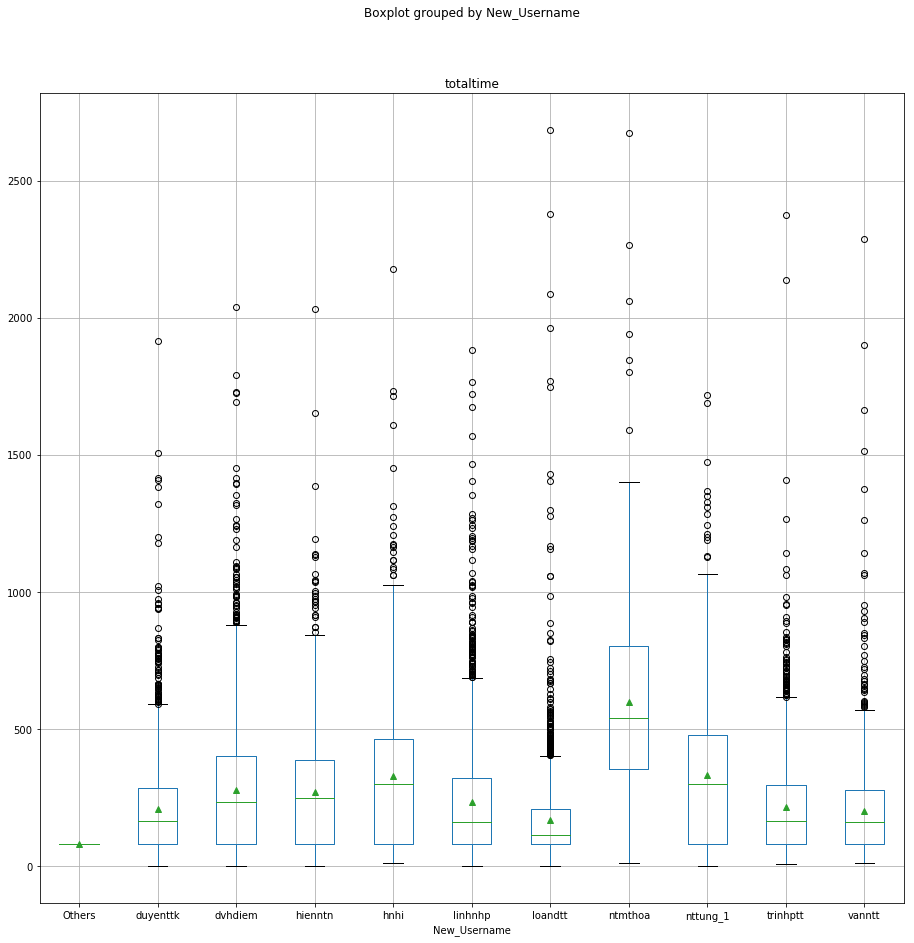

In [173]:

temp1 = df_10.groupby('New_Username').status.count()
temp1
df_10.boxplot(figsize=(15,15), column='totaltime', by = 'New_Username',showmeans=True)
